# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [35]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

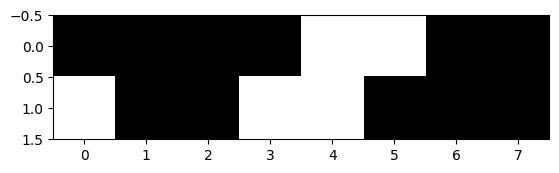

In [36]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



- $\textcolor{magenta}{Answer\ 1}  $

$$\boxed{\textcolor{orange}{U(x) = 8.\beta}}$$


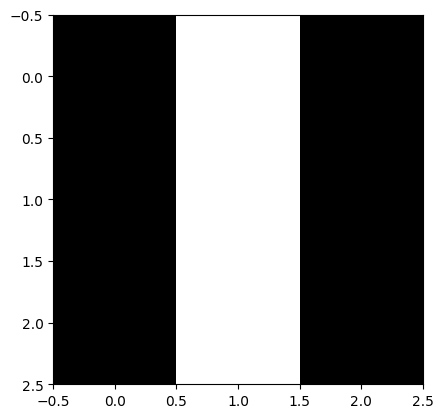

In [37]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).



$\textcolor{magenta}{Answer\ 2}  \\$
- The general form of the local conditional probability in a pixel s : $ \mathbb P(X_s = x_s | V_s) = \frac{1}{Z_s} \exp(-U(x_s, V_s))\\$
- We have E={0, 1} because the image is a binary image, and we are working with the Ising model with 8-connexity.
- Lets apply this to the central pixel :
    - $$ U(0, V_s) = \sum_{c \in C,s \in c} V_c(0, V_s) =  2.\beta\\$$
    - $$ U(1, V_s) = \sum_{c \in C,s \in c} V_c(1, V_s) =  6.\beta\\$$

So we have the local probas and also the local partition function :
     $$\mathbb P(X_s = 0 | V_s)  = \frac{1}{Z_s} \exp(-2\beta)\\ $$
     $$\mathbb P(X_s = 0 | V_s)  = \frac{1}{Z_s} \exp(-6\beta)\\ $$
     $$Z_s = \exp(-2\beta) + \exp(-6\beta)\\ $$
$\boxed{The\ most\ probable\ class\ is\ then\ {0}}$


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



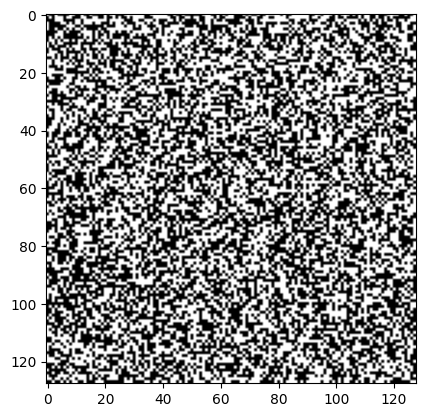

In [38]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [39]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0

            s_value= 0
            Ureg0= sum([(s_value != im_bin[i1,j]),(s_value != im_bin[i2,j]),(s_value != im_bin[i,j1]),(s_value != im_bin[i,j2])])
            Ureg0*=beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            s_value = 1
            Ureg1= 4*beta_reg - Ureg0
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

<Figure size 640x480 with 0 Axes>

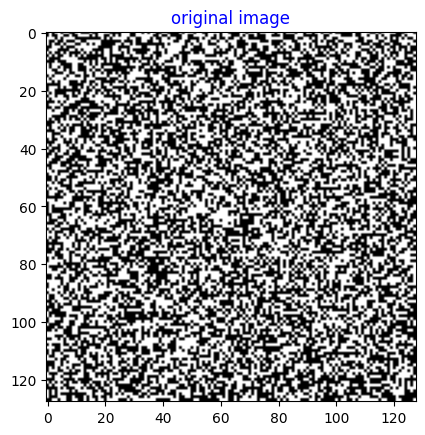

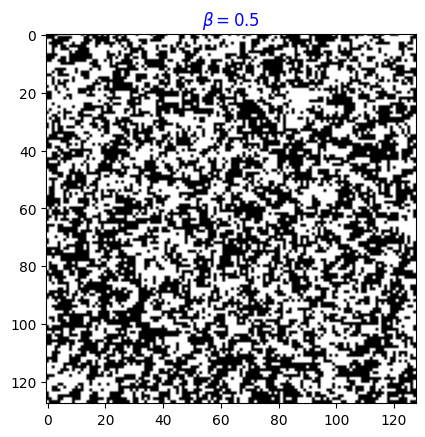

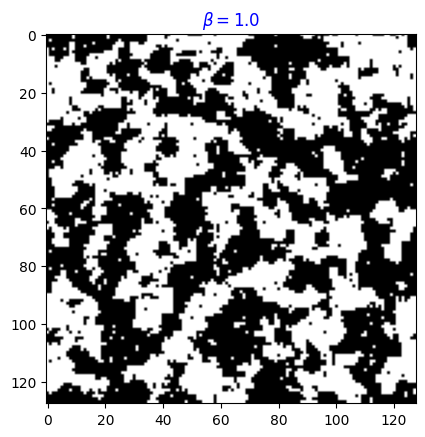

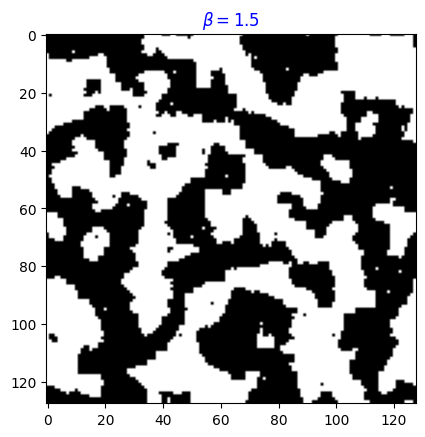

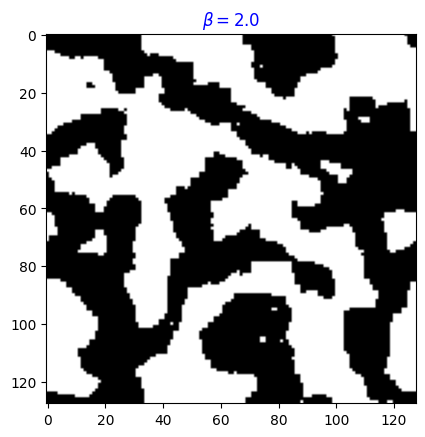

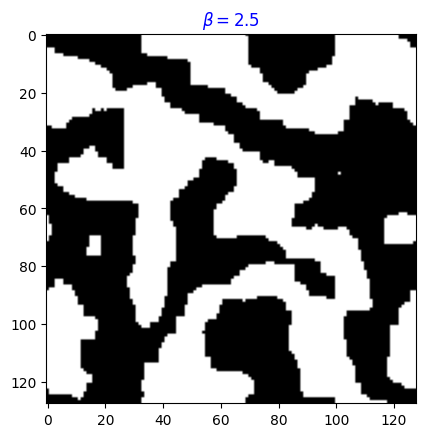

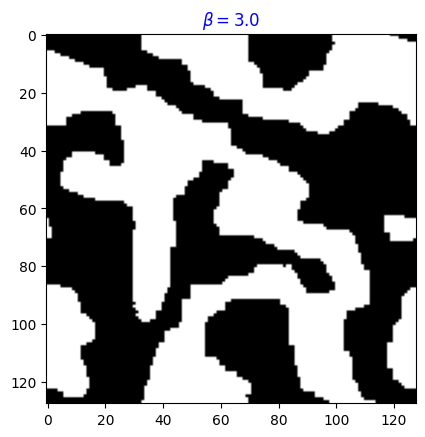

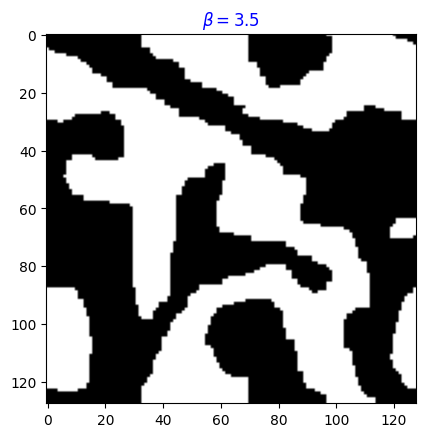

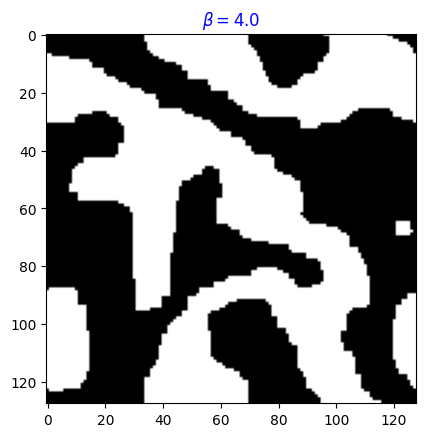

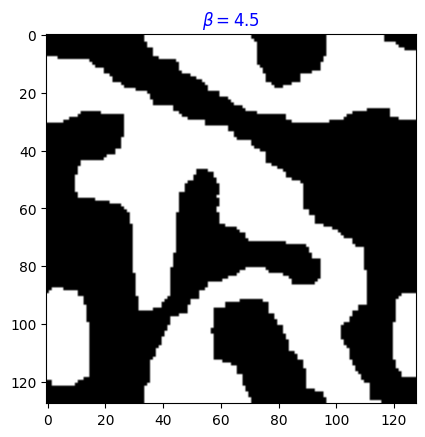

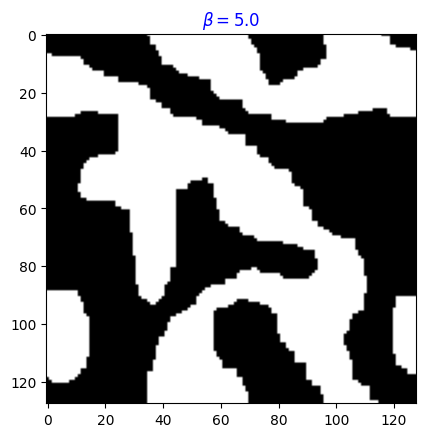

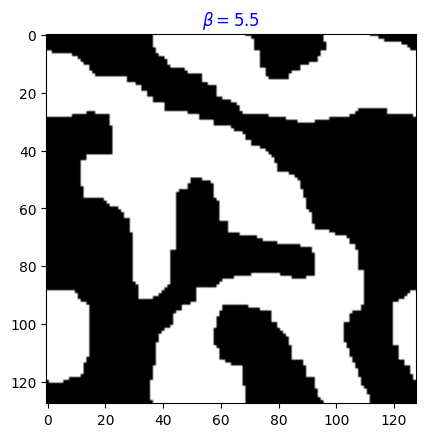

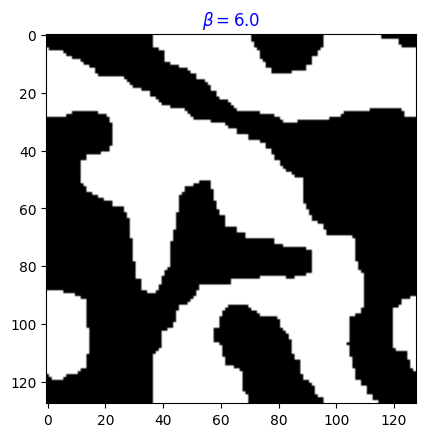

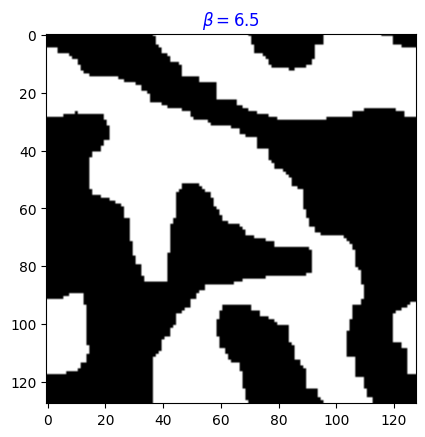

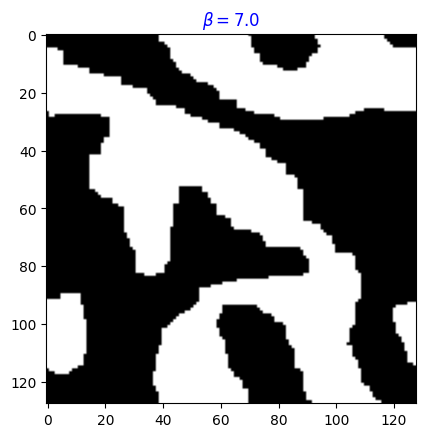

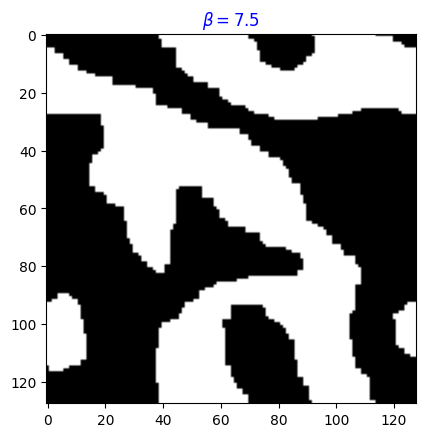

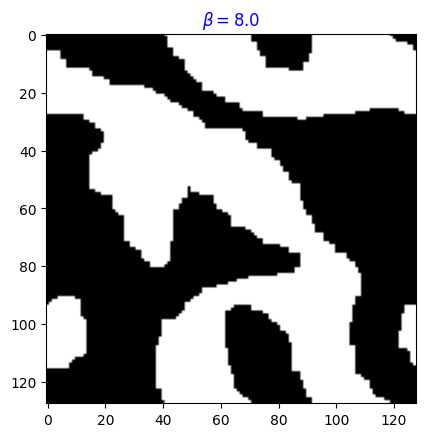

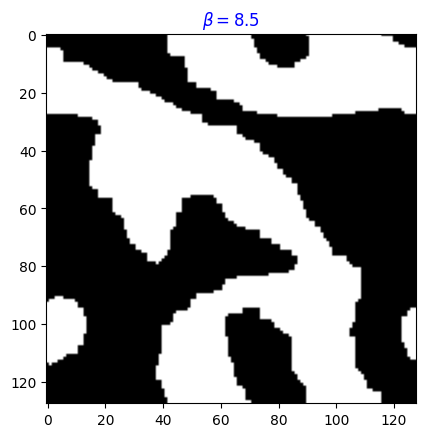

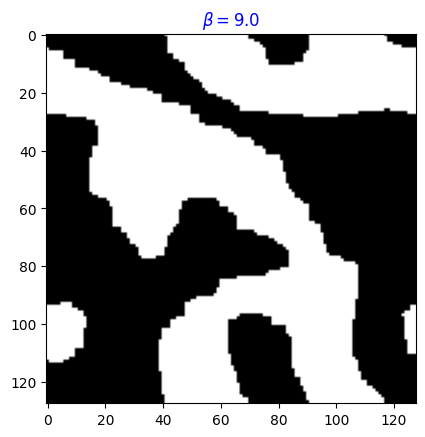

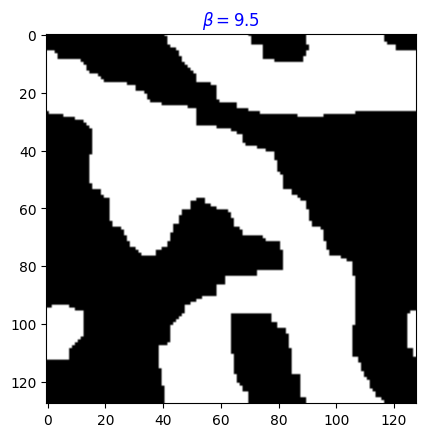

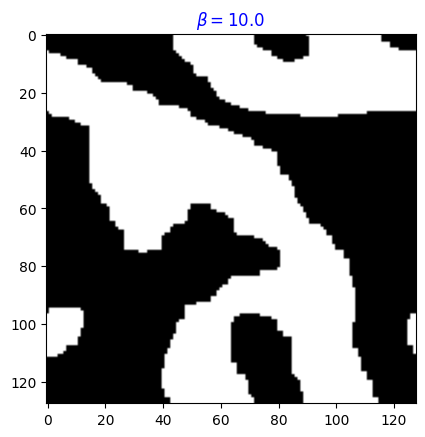

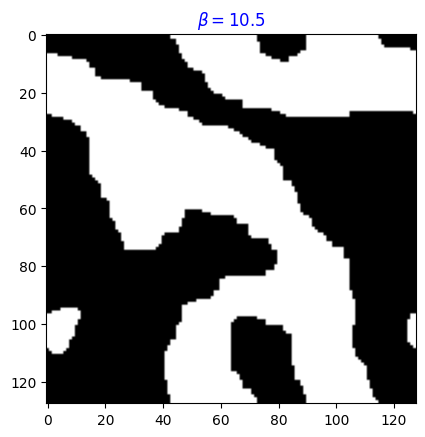

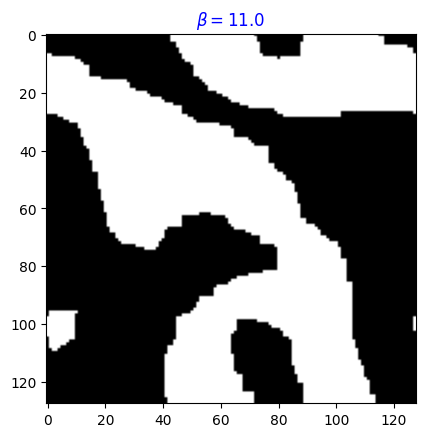

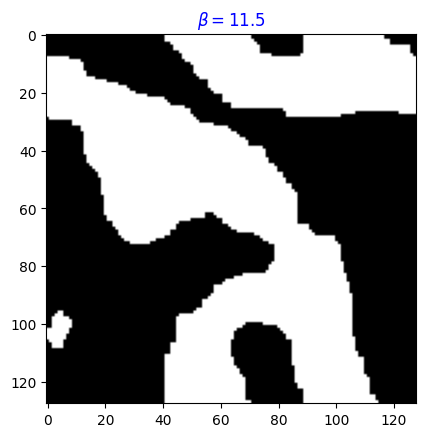

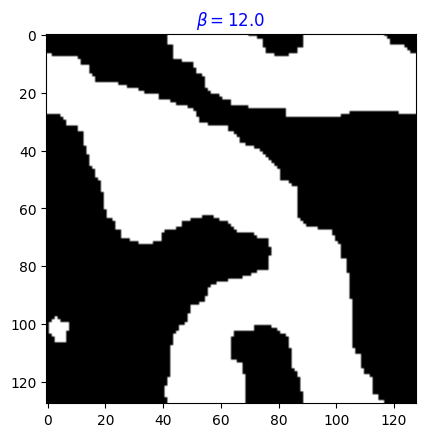

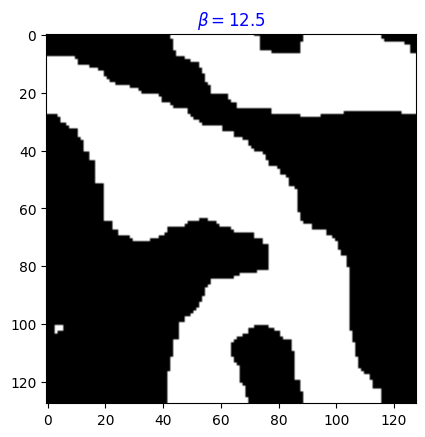

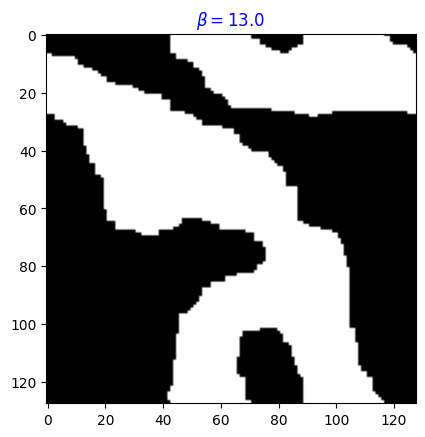

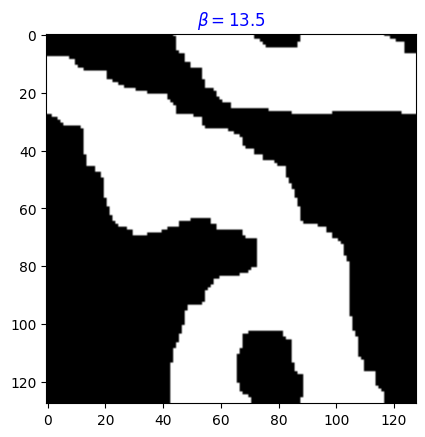

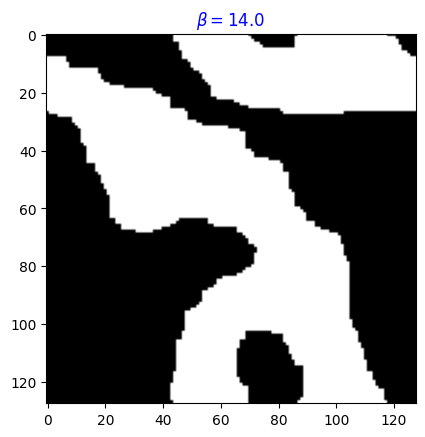

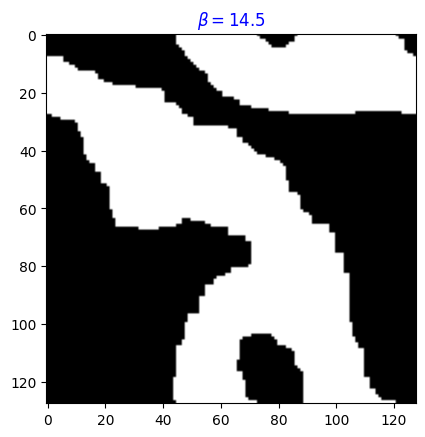

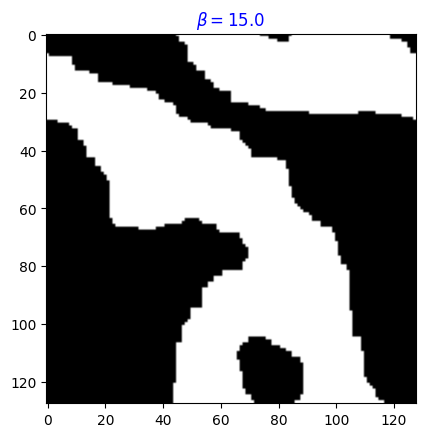

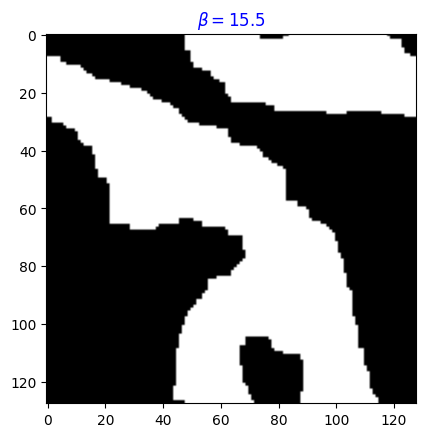

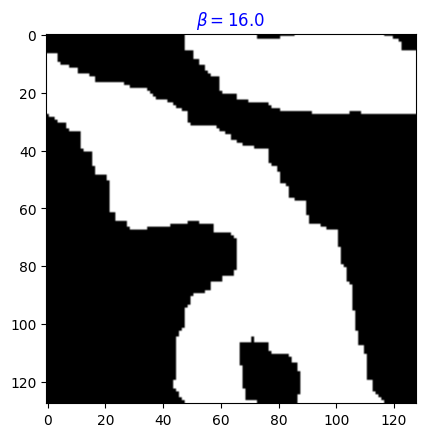

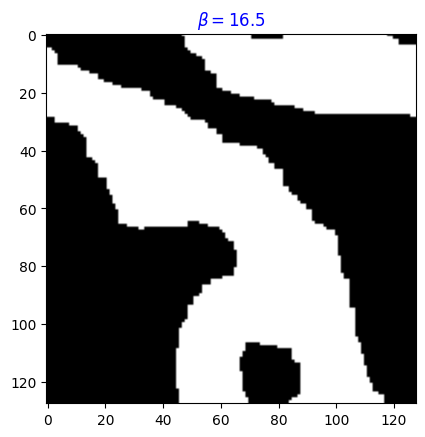

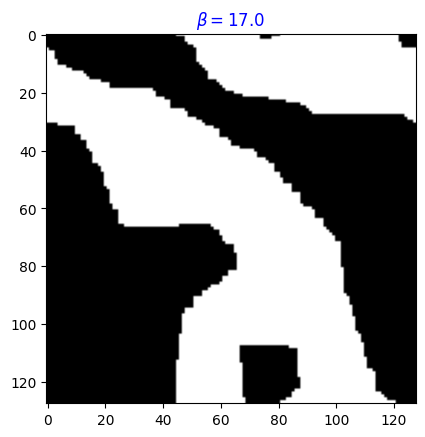

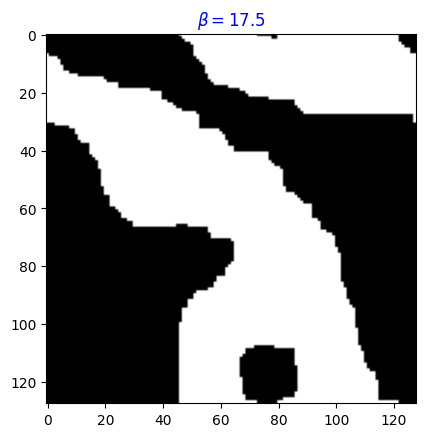

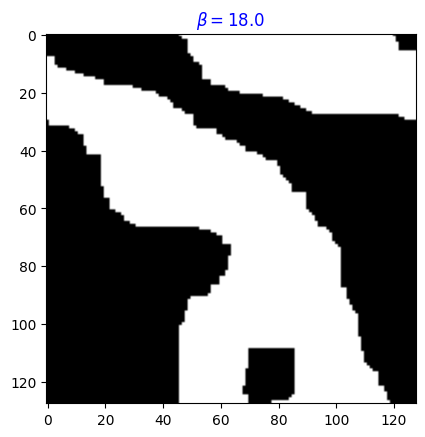

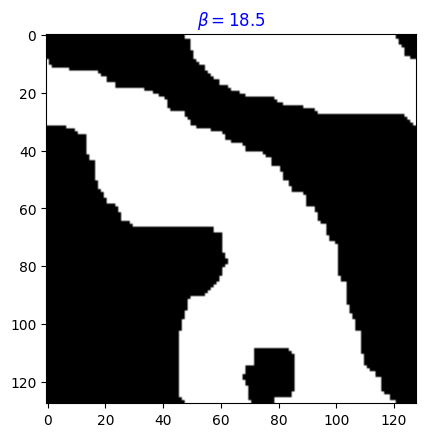

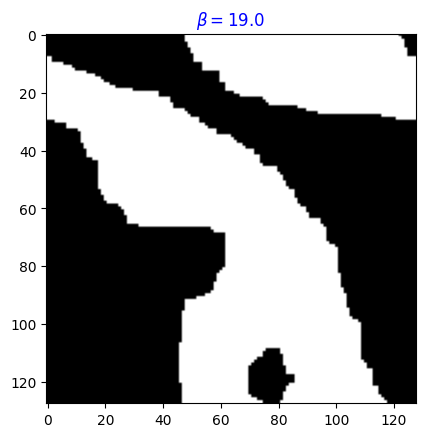

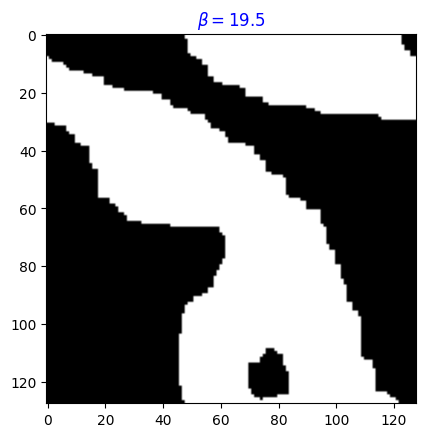

In [40]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg = 6

mafigure=plt.figure()
plt.imshow(im_bin);
plt.title("original image", color="blue")
mafigure.canvas.draw()
plt.show()
for beta_reg in np.arange(0.5, 20, 0.5):
    for n in range(10):
        echan(im_bin,beta_reg)
        #plt.imshow(im_bin)
        mafigure.canvas.draw()
        #plt.show(block=False)


    plt.figure()
    plt.imshow(im_bin)
    plt.title(r"$\beta =$" +str(beta_reg), color="blue")
    plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

- $\textcolor{magenta}{Answer\ 3}  $

$$\boxed{\textcolor{orange}{No,\ It's\ normal\ because,\ in\ every\ iteration,\ when\ we\ decide\ the\ value\ to\ give\ to\ a\ pixel,\ we\ are\ counting\ on\ a\ random\ variable.}}$$

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

- $\textcolor{magenta}{Answer\ 4}  $

#Q5
Which image minimizes the overall energy for this model?

- $\textcolor{magenta}{Answer\ 5}  $
$$\boxed{\textcolor{orange}{The\ constant\ image\ is\ the\ image\ that\ minimize\ the\ total\ energy\ in\ this\ model.}}$$


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

- $\textcolor{magenta}{Answer\ 6}  $

<Figure size 640x480 with 0 Axes>

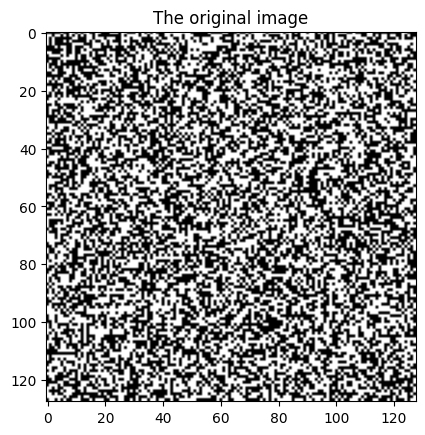

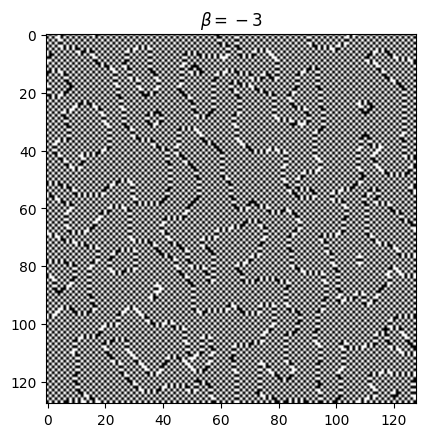

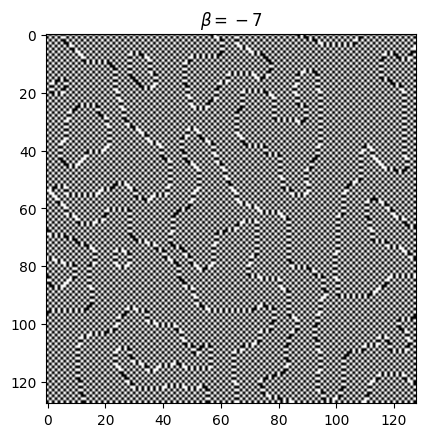

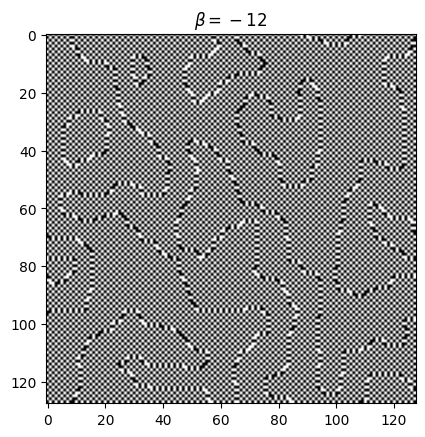

In [41]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))


mafigure=plt.figure()
plt.title("The original image")
plt.imshow(im_bin)
mafigure.canvas.draw()
plt.show()

beta_reg = -3
for n in range(10):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.title(r"$\beta = -3 $")
plt.imshow(im_bin)

beta_reg = -7
for n in range(10):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.title(r"$\beta = -7 $")
plt.imshow(im_bin)

beta_reg = -12
for n in range(10):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.title(r"$\beta = -12 $")
plt.imshow(im_bin)
plt.show()

- When $\beta$ is negative we samply inverse the order of the 2 probabilities. Normally, the algorithms gives each pixel the value of the most probable case which refers to the case with the minimum of energy (beta is positive in the normal situation). Hence, the algorithms look for uniformizing as possible the binary image. But when $\beta$ is negative we inverse the order and so the image is changed in the sense that maximize the energy and so in each iteration we choose the state that is different from the trending state in the neighboring set.
- We can see that we get the borders of the shapes formed when the $\beta$ was positive. These borders are alternatively in white/black.

In [42]:
print(im_bin)

[[1. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


- On pourra se tromper dans l'observation de l'image résultat en pensant que l'image contient du gris. Ce n'est qu'une illusion qui résulte de la grilles en noir et blanc. En effet, notre fonction de Gibbs n'affecte que 0 ou 1 aux pixels.

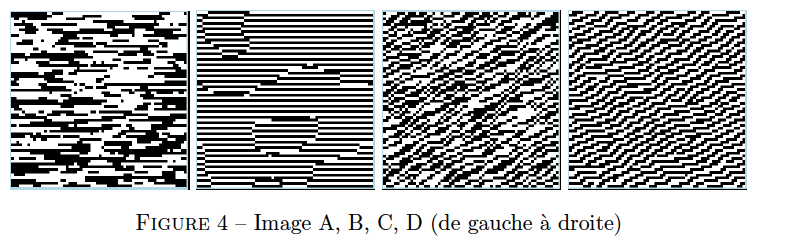

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





- $\textcolor{magenta}{Answer\ 7}  $
 - Image A : The only clique we have the $\textbf{\textcolor{orange}{horizontal}}$ one and we wont to favorize the horizoltal potential, so we have $\boxed{V_h(0, 0) = V_h(1, 1) = -1}$
 - Image B : We have an additional clique which is the $\textbf{\textcolor{orange}{vertical}}$ one, and the reason why we add it is to defavorize the vertical potential according to the image. So the vertical potensial is : $\boxed{V_v(0, 0) = V_v(1, 1) = 1}$
 - Image C : According to the image, the potention in the sens of the second diagonal is favorized. So the clique potential is $\textbf{\textcolor{orange}{Second\ diagonal\ (45 deg)\ }}$ $\boxed{V_{d2}(0, 0) = V_{d2}(1, 1) = -1}$
 - Image D : The potential is +1, so the goal is to defavorize the sens which is the first diagonal as we can see from the image that contain only clear uniform second diagonals.  So the clique potential is $\textbf{\textcolor{orange}{First\ diagonal\ (3 pi/4)}}$ $\boxed{V_{d1}(0, 0) = V_{d1}(1, 1) = 1}$

 $\implies$ The result we get is a second diagonal attractive potential. 

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

- $\textcolor{magenta}{Answer\ 8}  \\$ 
I choose to work with a positive beta, and give a positive potential to the clique in the  sens of the first diagonal, so that i will get an image with first diagonal lines. 

In [43]:
def echan_diagonal_attractive(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            #This time we will only consider the neighbours in the first diagonal [i1][i2], and [j1][j2]
        #Classe 1
            Ureg0=0
            if (im_bin[i1][j1]==1):
                Ureg0+=beta_reg
            if (im_bin[i2][j2]==1):
                Ureg0+=beta_reg
                
            p0=math.exp(-Ureg0);

        #Classe 2
            Ureg1=0
            if (im_bin[i1][j1]==0):
                Ureg1+=beta_reg
            if (im_bin[i2][j2]==0):
                Ureg1+=beta_reg
                
            p1=math.exp(-Ureg1);

            
        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

<Figure size 640x480 with 0 Axes>

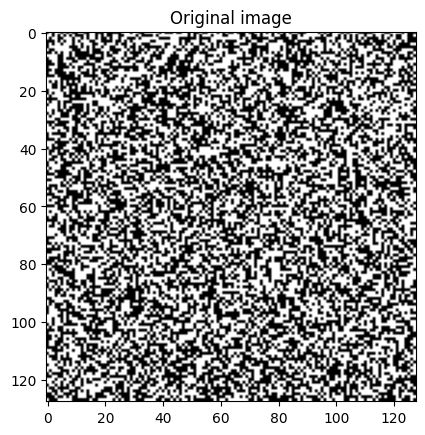

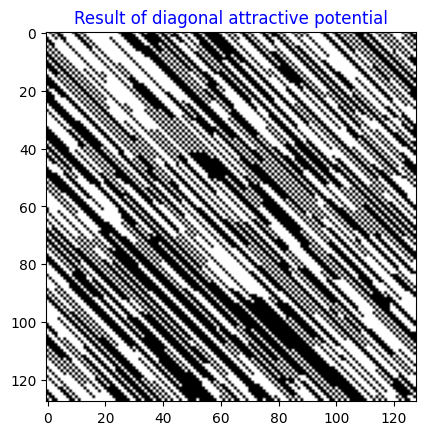

In [44]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg = 6

mafigure=plt.figure()
plt.title("Original image")
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()
for n in range(50):
    echan_diagonal_attractive(im_bin,beta_reg)
    #plt.imshow(im_bin)
    mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.title("Result of diagonal attractive potential", color="blue")
plt.show()

- $$ \boxed{\textcolor{orange}{We\ can\ see\ by\ zooming\ on\ a\ certain\ region\ in\ the\ image\ that\ the\ diagonals\ are\ likely\ to\ have\ the\ same\ value\ 0\ or\ 1.} }$$

AxesImage(size=(20, 20))


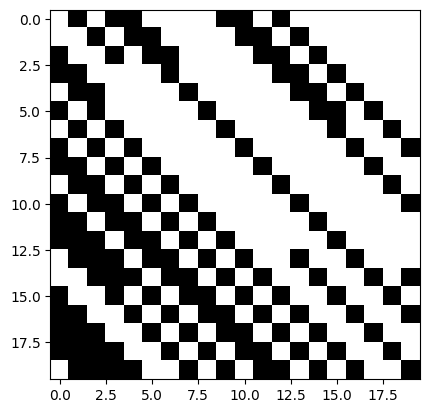

In [45]:
print(plt.imshow(im_bin[:20,:20]))